In [1]:
import tensorflow as tf
import keras as keras
import keras.backend as K
from resnet_keras_feature_fusion_v12 import ResNet_v12
from resnet_keras_feature_fusion_v9 import ResNet_v9
from resnet_keras_feature_fusion_v8 import ResNet_v8
from resnet_keras_feature_fusion_v7 import ResNet_v7
from resnet_keras_feature_fusion_v6 import ResNet_v6
from resnet_keras_feature_fusion_v5 import ResNet_v5
from resnet_keras_feature_fusion_v4 import ResNet_v4
from resnet_keras_feature_fusion_v3 import ResNet_v3
from resnet_keras_feature_fusion_v2 import ResNet_v2
from resnet_keras import ResNet
from test_cifar_iterative import attack_iterative
from test_cifar_jsma import attack_jsma
from test_cifar_optimization import attack_optimization
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import cifar10
import time
import numpy as np

Using TensorFlow backend.


In [2]:
(x_train, y_train),_ = keras.datasets.cifar10.load_data()

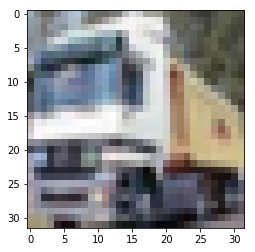

In [3]:
plt.imshow(x_train[1])

TypeError: bad operand type for unary -: 'str'

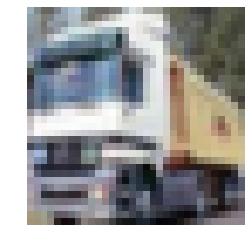

In [5]:
plt.imshow(x_train[1])
plt.axis('off')
plt.savefig('sample.png', bbox_inches='tight', pad_inches='tight')

In [2]:
x_train, y_train, x_test, y_test = cifar10.get_data()
y_test = np.argmax(y_test, axis=1)

In [3]:
resnet_lessdiv = ResNet_v12(x_train=x_train, y_train=y_train, x_val=x_test, y_val=y_test, load_weights=False)
resnet_lessdiv.construct()
model_lessdiv = resnet_lessdiv._model
model_lessdiv.load_weights('models/resnet_32_fusion_diversity_lessdiv_strongforhigher321v2_avg_weight_best.h5')

In [4]:
resnet_nfd = ResNet_v3(x_train=x_train, y_train=y_train, x_val=x_test, y_val=y_test, load_weights=False)
resnet_nfd.construct()
model_nfd = resnet_nfd._model
model_nfd.load_weights('models/resnet_32_nofusion_diversity_avg_weight_best.h5')

In [5]:
resnet_fnd = ResNet_v5(x_train=x_train, y_train=y_train, x_val=x_test, y_val=y_test, load_weights=False)
resnet_fnd.construct()
model_fnd = resnet_fnd._model
model_fnd.load_weights('models/resnet_32_fusion_nodiversity_avg_weight_best.h5')

In [6]:
model_baseline = keras.models.load_model('models/resnet_32_baseline_best_adam.h5')

In [7]:
predictionbase = model_baseline.predict(x_test)
predictionf = model_fnd.predict(x_test)
predictiond = model_nfd.predict(x_test)
predictionfd = model_lessdiv.predict(x_test)

In [8]:
x_tsnebase = TSNE(learning_rate=100).fit_transform(predictionbase)
x_tsnef = TSNE(learning_rate=100).fit_transform(predictionf)
x_tsned = TSNE(learning_rate=100).fit_transform(predictiond)
x_tsnefd = TSNE(learning_rate=100).fit_transform(predictionfd)

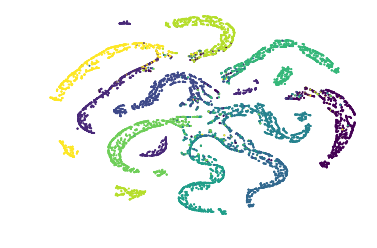

In [9]:
plt.scatter(x_tsnebase[:,0], x_tsnebase[:,1],s=1, c=y_test)
plt.axis('off')
plt.savefig('tbase.png')

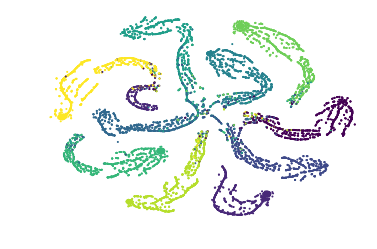

In [10]:
plt.scatter(x_tsnef[:,0], x_tsnef[:,1],s=1, c=y_test)
plt.axis('off')
plt.savefig('tf.png')

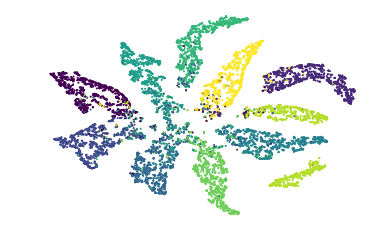

In [11]:
plt.scatter(x_tsned[:,0], x_tsned[:,1],s=1, c=y_test)
plt.axis('off')
plt.savefig('td.png')

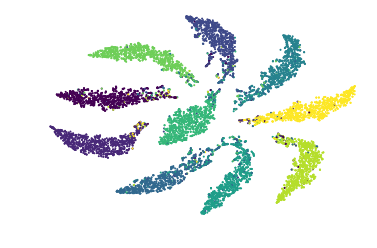

In [12]:
plt.scatter(x_tsnefd[:,0], x_tsnefd[:,1],s=1, c=y_test)
plt.axis('off')
plt.savefig('tfd.png')

In [8]:
predictions = model_lessdiv.predict(x_test)

In [9]:
x_tsne = TSNE(learning_rate=100).fit_transform(predictions)

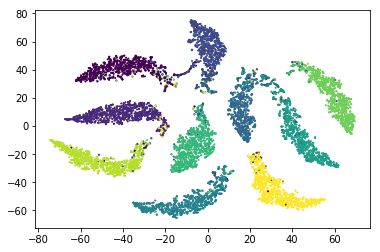

In [9]:
plt.scatter(x_tsne[:,0], x_tsne[:,1],s=1, c=y_test)
plt.savefig('fd.png')

In [5]:
exit3 = keras.models.Model(model_lessdiv.inputs, model_lessdiv.get_layer('activation_36').output)
exit2 = keras.models.Model(model_lessdiv.inputs, model_lessdiv.get_layer('activation_35').output)
exit1 = keras.models.Model(model_lessdiv.inputs, model_lessdiv.get_layer('activation_34').output)

In [6]:
prediction1 = exit1.predict(x_test)
prediction2 = exit2.predict(x_test)
prediction3 = exit3.predict(x_test)

In [7]:
x_tsne1 = TSNE(learning_rate=100).fit_transform(prediction1)
x_tsne2 = TSNE(learning_rate=100).fit_transform(prediction2)
x_tsne3 = TSNE(learning_rate=100).fit_transform(prediction3)

(-80.46111867031887, 82.26707264981103, -82.76738767925652, 72.9195788413659)

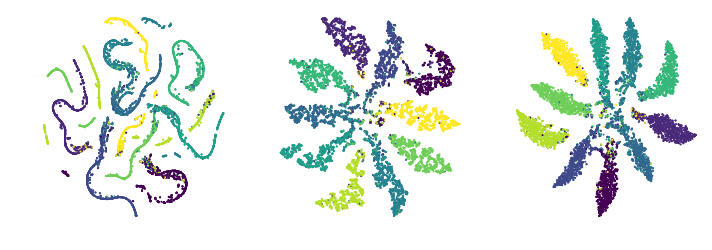

In [16]:
plt.figure(figsize=(12,4))
 
plt.subplot(1, 3, 1)  
plt.scatter(x_tsne1[:,0], x_tsne1[:,1],s=1, c=y_test)
# plt.xlabel(u'(a)')
plt.axis('off')
 
plt.subplot(1, 3, 2)  
plt.scatter(x_tsne2[:,0], x_tsne2[:,1],s=1, c=y_test)
# plt.xlabel(u'(b)')
plt.axis('off')
 
plt.subplot(1, 3, 3) 
plt.scatter(x_tsne3[:,0], x_tsne3[:,1],s=1, c=y_test)
# plt.xlabel(u'(c)')
plt.axis('off')


In [10]:
model_baseline = keras.models.load_model('models/resnet_32_baseline_best_adam.h5')

In [11]:
predictions_base = model_baseline.predict(x_test)

In [12]:
x_tsne_base = TSNE(learning_rate=100).fit_transform(predictions_base)

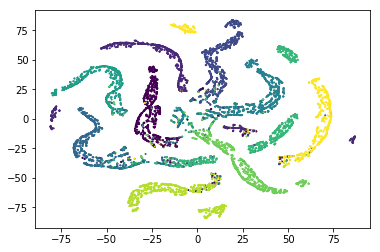

In [6]:
plt.scatter(x_tsne_base[:,0], x_tsne_base[:,1],s=1, c=y_test)
plt.savefig('baselineadam.png')

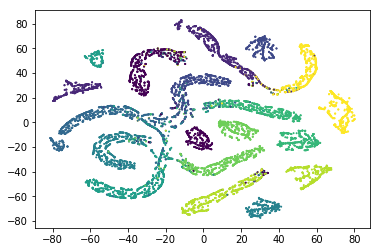

In [6]:
plt.scatter(x_tsne[:,0], x_tsne[:,1],s=1, c=y_test)
plt.savefig('baseline.png')